# Background

Logistic Regression is the simplest and efficient method for binary classification models. With this model, we expect to predict the outcome of a patient based on the most important features of the database.

# Dependencies

**Connect and Load Data**

In [1]:
# Using SQLalchemy
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session

**Manage the Data from the Database**

In [2]:
import pandas as pd
import numpy as np

# Display of the Pandas Database
pd.set_option('display.float_format',lambda x:"%.4f"%x)
pd.set_option('display.max_columns', None)

**Data Visualization**

In [3]:
import matplotlib.pyplot as plt

**Use sklearn library to predict the outcome of a patient**

In [4]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

In [5]:
# ML Model. Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,classification_report,confusion_matrix

# Load Data

**SQAlquemy to load the data from AWS**

In [6]:
from access.config import db_password
db_host = 'data-analytics-final-project-t2.ceptpmc0vrha.us-east-1.rds.amazonaws.com'
db_name = 'Medical_Data'

db_string = f"postgresql://postgres:{db_password}@{db_host}:5432/{db_name}"
# engine = create_engine(db_string)

# inspector = inspect(engine)

patients = pd.read_sql_table('patients_final',db_string)
patients.sample(n=5)

,identification,healthcare_center,covid_test_negative,covid_test_positive,pcr_antigen,inclusion_positive_covid_tests,exclusion_nofile,birth_date,age,sex,pregnancy,admission_date,symptons_onset,comorbilities,obesity,diabetes_mellitus,arterial_hypertension,autoimmune_disease,immunosuppression,cancer,smoking,alcoholism,copd,interstitial_lung_disease,tuberculosis,asthma,cardiovascular_disease,renal_disease,hepatic_disease,neurological_disease,systemic_lupus_erythematosus,rheumatoid_arthritis,scleroderma,psoriasis,inflammatory_bowel_disease,vasculitis,hiv,organ_transplantation,use_of_immunosuppressants,primary_immunodeficiency,splenectomy,hematological_cancer,active_cancer,others_cancer,active_smoking,years_smoking,cigarrettes_per_day,vaccination,temperature_c,respiratory_rate,heart_rate,oximeter_saturation,systolic_blood_pressure,diastolic_blood_pressure,height_cm,weight_kg,glasgow_coma_scale,dopamine,dosis_of_dopamine_or_norepinephrine,mean_arterial_pressure,use_of_oxygen_before_arrival,administration_of_oxygen_in_any_modality_at_any_time_during_the,maximum_respiratory_support_during_any_time_of_the_hospitalizat,imv_respiratory_support,pronation_respiratory_support,ecmo_respiratory_support,date_of_intubation,date_of_extubation,peritoneal_dialysis,hemodialysis,outcome,leaving_date,stay_lenght,death_with_imv,acute_myocardial_infarction,respiratory_failure_due_to_covid,tia,sudden_death_not_specified,pulmonary_thromboembolism,sepsis,nosocomial_infection,other,sudden_death_massive_tia_heart_attack_pulmonary_embolism,rejected_intubation_or_terminal_disease,fan_unavailability,other_cause,died_in_the_first_24_hours_of_hospitalization,latitude,longitude
1100,1099,HRAEI,False,True,PCR,False,False,1976-07-01,45.25486492,Female,False,2020-01-22,7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,False,36.3,15,73,90,100,60,160,60,13 - 14,False,No dosis,73.33333333,1,False,Nasal cannula,False,False,False,1970-01-01,1970-01-01,False,False,Death,2020-01-28,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,19.31893,-98.85468
2366,2367,HRAEI,False,True,PCR,True,False,1957-09-22,64.01500373,Male,False,2020-07-13,14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,False,36.5,18,59,96,130,80,145,23.1,13 - 14,False,No dosis,96.66666667,1,False,Invasive Mechanical Ventilation,True,False,False,2020-07-14,2020-07-27,False,False,Death,2020-07-27,14,True,False,False,False,False,False,False,False,False,False,False,False,False,False,19.31893,-98.85468
3139,3140,HRAEI,False,True,PCR,True,False,1967-09-08,53.42204152,Male,False,2020-02-28,12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,False,35.1,24,73,83,100,60,172,89.4,13 - 14,False,No dosis,73.33333333,1,False,Invasive Mechanical Ventilation,True,False,False,2020-03-01,2020-03-12,False,False,Death,2020-03-12,13,True,False,False,False,False,False,False,False,False,False,False,False,False,False,19.31893,-98.85468
4413,4443,HRAEI,False,True,PCR,True,False,1993-09-26,28.06902264,Female,False,2021-06-17,15,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,False,36.9,17,86,54,110,70,155,60,13 - 14,False,No dosis,83.33333333,1,False,High Flow Nasal Oxygen,False,False,False,1970-01-01,1970-01-01,False,False,Death,2021-06-18,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,19.31893,-98.85468
1436,1437,HRAEI,False,True,PCR,True,False,1958-12-23,62.56938883,Male,False,2

**Filter Positive-COVID Patients**

In [7]:
covid_patients = patients[patients['covid_test_negative']==False].copy()

# Variable Categorization

For the analysis, it will be easier to discriminate the continuous variables (varc) from the discrete ones (vard). This way we identify the unary values in the discrete columns, and outliers in the continuous ones.

In [8]:
covid_patients.sample(n=3)

,identification,healthcare_center,covid_test_negative,covid_test_positive,pcr_antigen,inclusion_positive_covid_tests,exclusion_nofile,birth_date,age,sex,pregnancy,admission_date,symptons_onset,comorbilities,obesity,diabetes_mellitus,arterial_hypertension,autoimmune_disease,immunosuppression,cancer,smoking,alcoholism,copd,interstitial_lung_disease,tuberculosis,asthma,cardiovascular_disease,renal_disease,hepatic_disease,neurological_disease,systemic_lupus_erythematosus,rheumatoid_arthritis,scleroderma,psoriasis,inflammatory_bowel_disease,vasculitis,hiv,organ_transplantation,use_of_immunosuppressants,primary_immunodeficiency,splenectomy,hematological_cancer,active_cancer,others_cancer,active_smoking,years_smoking,cigarrettes_per_day,vaccination,temperature_c,respiratory_rate,heart_rate,oximeter_saturation,systolic_blood_pressure,diastolic_blood_pressure,height_cm,weight_kg,glasgow_coma_scale,dopamine,dosis_of_dopamine_or_norepinephrine,mean_arterial_pressure,use_of_oxygen_before_arrival,administration_of_oxygen_in_any_modality_at_any_time_during_the,maximum_respiratory_support_during_any_time_of_the_hospitalizat,imv_respiratory_support,pronation_respiratory_support,ecmo_respiratory_support,date_of_intubation,date_of_extubation,peritoneal_dialysis,hemodialysis,outcome,leaving_date,stay_lenght,death_with_imv,acute_myocardial_infarction,respiratory_failure_due_to_covid,tia,sudden_death_not_specified,pulmonary_thromboembolism,sepsis,nosocomial_infection,other,sudden_death_massive_tia_heart_attack_pulmonary_embolism,rejected_intubation_or_terminal_disease,fan_unavailability,other_cause,died_in_the_first_24_hours_of_hospitalization,latitude,longitude
2396,2397,HRAEI,False,True,PCR,True,False,1954-04-21,67.50035935,Female,False,2020-08-24,7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,False,36.3,34,90,90,100,80,154,68,13 - 14,False,No dosis,86.66666667,1,False,Nasal cannula,False,False,False,1970-01-01,1970-01-01,False,False,Discharge home for improvement,2020-08-24,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,19.31893,-98.85468
2479,2480,HRAEI,False,True,PCR,True,False,1965-10-28,55.9135369,Male,False,2020-08-11,7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,False,36.6,16,66,96,130,80,167,82,13 - 14,False,No dosis,96.66666667,1,False,Invasive Mechanical Ventilation,True,False,False,2020-08-11,2020-08-18,False,False,Death,2020-08-18,7,True,False,False,False,False,False,False,False,False,False,False,False,False,False,19.31893,-98.85468
2849,2850,HRAEI,False,True,PCR,True,False,1977-09-25,43.92424211,Male,False,2020-09-06,7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,False,36.7,19,68,35,108,78,165,100,13 - 14,False,No dosis,88,1,False,Nasal cannula,False,False,False,1970-01-01,1970-01-01,False,False,Discharge home for improvement,2020-09-06,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,19.31893,-98.85468


In [9]:
vard = 'healthcare_center	covid_test_negative	covid_test_positive	pcr_antigen	inclusion_positive_covid_tests	exclusion_nofile	sex	pregnancy	comorbilities	obesity	diabetes_mellitus	arterial_hypertension	autoimmune_disease	immunosuppression	cancer	smoking	alcoholism	copd	interstitial_lung_disease	tuberculosis	asthma	cardiovascular_disease	renal_disease	hepatic_disease	neurological_disease	systemic_lupus_erythematosus	rheumatoid_arthritis	scleroderma	psoriasis	inflammatory_bowel_disease	vasculitis	hiv	organ_transplantation	use_of_immunosuppressants	primary_immunodeficiency	splenectomy	hematological_cancer	active_cancer	others_cancer	active_smoking	vaccination	glasgow_coma_scale	dopamine	dosis_of_dopamine_or_norepinephrine	use_of_oxygen_before_arrival	administration_of_oxygen_in_any_modality_at_any_time_during_the	maximum_respiratory_support_during_any_time_of_the_hospitalizat	imv_respiratory_support	pronation_respiratory_support	ecmo_respiratory_support	peritoneal_dialysis	hemodialysis	outcome'
varc = ['age','symptons_onset','years_smoking','cigarrettes_per_day','temperature_c','respiratory_rate','heart_rate','oximeter_saturation','systolic_blood_pressure','diastolic_blood_pressure','height_cm','weight_kg','mean_arterial_pressure','stay_lenght']
dates = covid_patients.filter(regex=("[Dd]ate")).columns.to_list()
lat_lon = 'latitude	longitude'
gossipy_vars = ['died_in_the_first_24_hours_of_hospitalization','death_with_imv',
                'respiratory_failure_due_to_covid', 'sepsis', 'nosocomial_infection',
                'acute_myocardial_infarction','tia','sudden_death_not_specified',
                'pulmonary_thromboembolism','sepsis','nosocomial_infection','other',
                'sudden_death_massive_tia_heart_attack_pulmonary_embolism',
                'rejected_intubation_or_terminal_disease','fan_unavailability','other_cause']

# split vard and lat_lon
vard = vard.split('	')
lat_lon = lat_lon.split('	')

Delete the variables that were collected when the patient died stored in gossipy_vars

In [10]:
covid_patients.drop(gossipy_vars,axis=1,inplace=True)

# Exploratory Analisis
## Discrete Columns

To automatize the analysis of this columns, we created a function that helps to measure the frecuency of values in each column. The function will return a printed table for each column inputed in 'var', in which we'll see the name of the column, and a list of the values with Absolute Frecuency *AF* and Relative Frecuency *RF*

In [11]:
def freq(df,var):
    
    # the var we want to analyze is a list
    if type(var)!=list:
        var = [var]
    
    for v in var:
        # Make a pd.dataframe with the values counts
        aux = df[v].value_counts().to_frame()
        
        # rename the Count column to 'AF':
        # Absolute Frequency
        aux.columns = ['AF']
        
        # Get the Relative Frequency (FR)
        aux['RF'] = aux['AF']/aux['AF'].sum()
        
        # Print the results
        print(f"Frequencies Table for the Column \033[1m** {v} **\033[0m",end="\n")
        print(aux,end="\n"*2)

In [12]:
freq(covid_patients,vard)

Frequencies Table for the Column ** healthcare_center **
              AF     RF
HRAEI       3858 0.7374
INER         871 0.1665
HJM          156 0.0298
GEA          140 0.0268
HRAEPY        45 0.0086
HIM           45 0.0086
HGM           43 0.0082
HRAEO         43 0.0082
Nutrici√≥n    14 0.0027
HRAECV        12 0.0023
HRAEB          3 0.0006
INCICH         1 0.0002
HRAECS         1 0.0002

Frequencies Table for the Column ** covid_test_negative **
         AF     RF
False  5232 1.0000

Frequencies Table for the Column ** covid_test_positive **
        AF     RF
True  5232 1.0000

Frequencies Table for the Column ** pcr_antigen **
           AF     RF
PCR      5119 0.9784
Antigen   113 0.0216

Frequencies Table for the Column ** inclusion_positive_covid_tests **
         AF     RF
True   5002 0.9560
False   230 0.0440

Frequencies Table for the Column ** exclusion_nofile **
         AF     RF
False  5232 1.0000

Frequencies Table for the Column ** sex **
          AF     RF
Male    326

### Normalize

A model with too many variables is likely to overfit the training dataset and therefore may not perform well on new data. 

We wanted to normalize those values and reduce the variance, so the values in which their Relative Frequency is less than 1%, wi'll be replaced by the *mode* of the column or *OTHERS* value.

It will be important to normalize the data, so the columns in which we have small amounts of data doesn't disturb the ML Model. We'll locate those values where the **Relative Frequency** is low.

**Logic of the Function**  

In order to achive that, we created a function that inputs: the dataframe, a variable to be normalized and the treshold (set to 1%)

The function will use the value_counts by percentage, to filter and mark the values in which the percentage of the value is less than the treshold with *OTHERS*. If the sum of OTHERS is less than the treshold, then those values will be replaced in the dataframe with the *MODE* value. Otherwise, those values will remain as *OTHERS*

In [13]:
def normalize(df,var,treshold=0.01):
    # Get the RF, using .value_counts(True)
    aux = df[var].value_counts(True).to_frame()

    # Locate those values which RF is less than the treshold, as OTHERS
    aux['norm'] = np.where(aux[var]<treshold,'OTHERS',aux.index)
    
    # Save the mode
    mode = aux.head(1)['norm'].values[0]
    
    # If the sum of OTHERS variables is less than the umbral
    if aux[aux['norm']=='OTHERS'][var].sum()<treshold:
        # Replace those values with the mode
        aux['norm'].replace({'OTHERS':mode},inplace=True)
    
    aux.drop(var,axis=1,inplace=True)
    df = df.replace({var:aux.to_dict()['norm']})
    return df

In [14]:
# Apply the normalize function to all the discrete columns 
for var in vard:
    covid_patients = normalize(covid_patients,var)

In [15]:
freq(covid_patients,vard)

Frequencies Table for the Column ** healthcare_center **
          AF     RF
HRAEI   3858 0.7374
INER     871 0.1665
OTHERS   207 0.0396
HJM      156 0.0298
GEA      140 0.0268

Frequencies Table for the Column ** covid_test_negative **
         AF     RF
False  5232 1.0000

Frequencies Table for the Column ** covid_test_positive **
        AF     RF
True  5232 1.0000

Frequencies Table for the Column ** pcr_antigen **
           AF     RF
PCR      5119 0.9784
Antigen   113 0.0216

Frequencies Table for the Column ** inclusion_positive_covid_tests **
         AF     RF
True   5002 0.9560
False   230 0.0440

Frequencies Table for the Column ** exclusion_nofile **
         AF     RF
False  5232 1.0000

Frequencies Table for the Column ** sex **
          AF     RF
Male    3264 0.6239
Female  1968 0.3761

Frequencies Table for the Column ** pregnancy **
         AF     RF
False  5232 1.0000

Frequencies Table for the Column ** comorbilities **
         AF     RF
False  3270 0.6250
True   

### Drop Univariate Columns

In [16]:
# Locate the unary discrete columns with a list comprehension
unary_list = [v for v,n in zip(vard,[covid_patients[v].unique().shape[0] for v in vard]) if n == 1]

print('Unary Columns: ', end=' ')
for v in unary_list:
    print(v, end=', ')
print(f"\n\nWe'll be deleting: {len(unary_list)} columns")

Unary Columns:  covid_test_negative, covid_test_positive, exclusion_nofile, pregnancy, autoimmune_disease, immunosuppression, cancer, copd, interstitial_lung_disease, tuberculosis, asthma, renal_disease, hepatic_disease, neurological_disease, systemic_lupus_erythematosus, rheumatoid_arthritis, scleroderma, psoriasis, inflammatory_bowel_disease, vasculitis, hiv, organ_transplantation, use_of_immunosuppressants, primary_immunodeficiency, splenectomy, hematological_cancer, active_cancer, others_cancer, ecmo_respiratory_support, peritoneal_dialysis, 

We'll be deleting: 30 columns


**Zip Functionality**<p> 
The zip function only returns a dictionary in which we have the column_names as keys and the count of its values as their pair. <br> 
This way we'll be able to have the column names in which there's a unique value

In [17]:
# Zip function
print(vard[0:3],[covid_patients[v].unique().shape[0] for v in vard][0:3])
zip(vard[0:3],[covid_patients[v].unique().shape[0] for v in vard[0:3]])

['healthcare_center', 'covid_test_negative', 'covid_test_positive'] [5, 1, 1]


In [18]:
# Delete the columns from unary_list
for v in unary_list:
    vard.remove(v)

covid_patients.drop(unary_list,axis=1,inplace=True)

In [19]:
# So we ended up with:
freq(covid_patients,vard)

Frequencies Table for the Column ** healthcare_center **
          AF     RF
HRAEI   3858 0.7374
INER     871 0.1665
OTHERS   207 0.0396
HJM      156 0.0298
GEA      140 0.0268

Frequencies Table for the Column ** pcr_antigen **
           AF     RF
PCR      5119 0.9784
Antigen   113 0.0216

Frequencies Table for the Column ** inclusion_positive_covid_tests **
         AF     RF
True   5002 0.9560
False   230 0.0440

Frequencies Table for the Column ** sex **
          AF     RF
Male    3264 0.6239
Female  1968 0.3761

Frequencies Table for the Column ** comorbilities **
         AF     RF
False  3270 0.6250
True   1962 0.3750

Frequencies Table for the Column ** obesity **
         AF     RF
False  4214 0.8054
True   1018 0.1946

Frequencies Table for the Column ** diabetes_mellitus **
         AF     RF
False  4413 0.8435
True    819 0.1565

Frequencies Table for the Column ** arterial_hypertension **
         AF     RF
False  4484 0.8570
True    748 0.1430

Frequencies Table for the

In [20]:
covid_patients.shape

(5232, 45)

## Continuous Columns

### Analysis
Get to know the continous columns with its histogram that shows the distribution of its values

In [21]:
covid_patients[varc] = covid_patients[varc].astype(float)
covid_patients[varc].head(2)

,age,symptons_onset,years_smoking,cigarrettes_per_day,temperature_c,respiratory_rate,heart_rate,oximeter_saturation,systolic_blood_pressure,diastolic_blood_pressure,height_cm,weight_kg,mean_arterial_pressure,stay_lenght
0,51.7683,6.0000,0.0000,0.0000,36.5000,50.0000,113.0000,76.0000,127.0000,81.0000,163.0000,73.0000,96.3333,23.0000
1,39.9926,8.0000,0.0000,0.0000,37.4000,36.0000,100.0000,87.0000,130.0000,83.0000,168.0000,75.0000,98.6667,23.0000


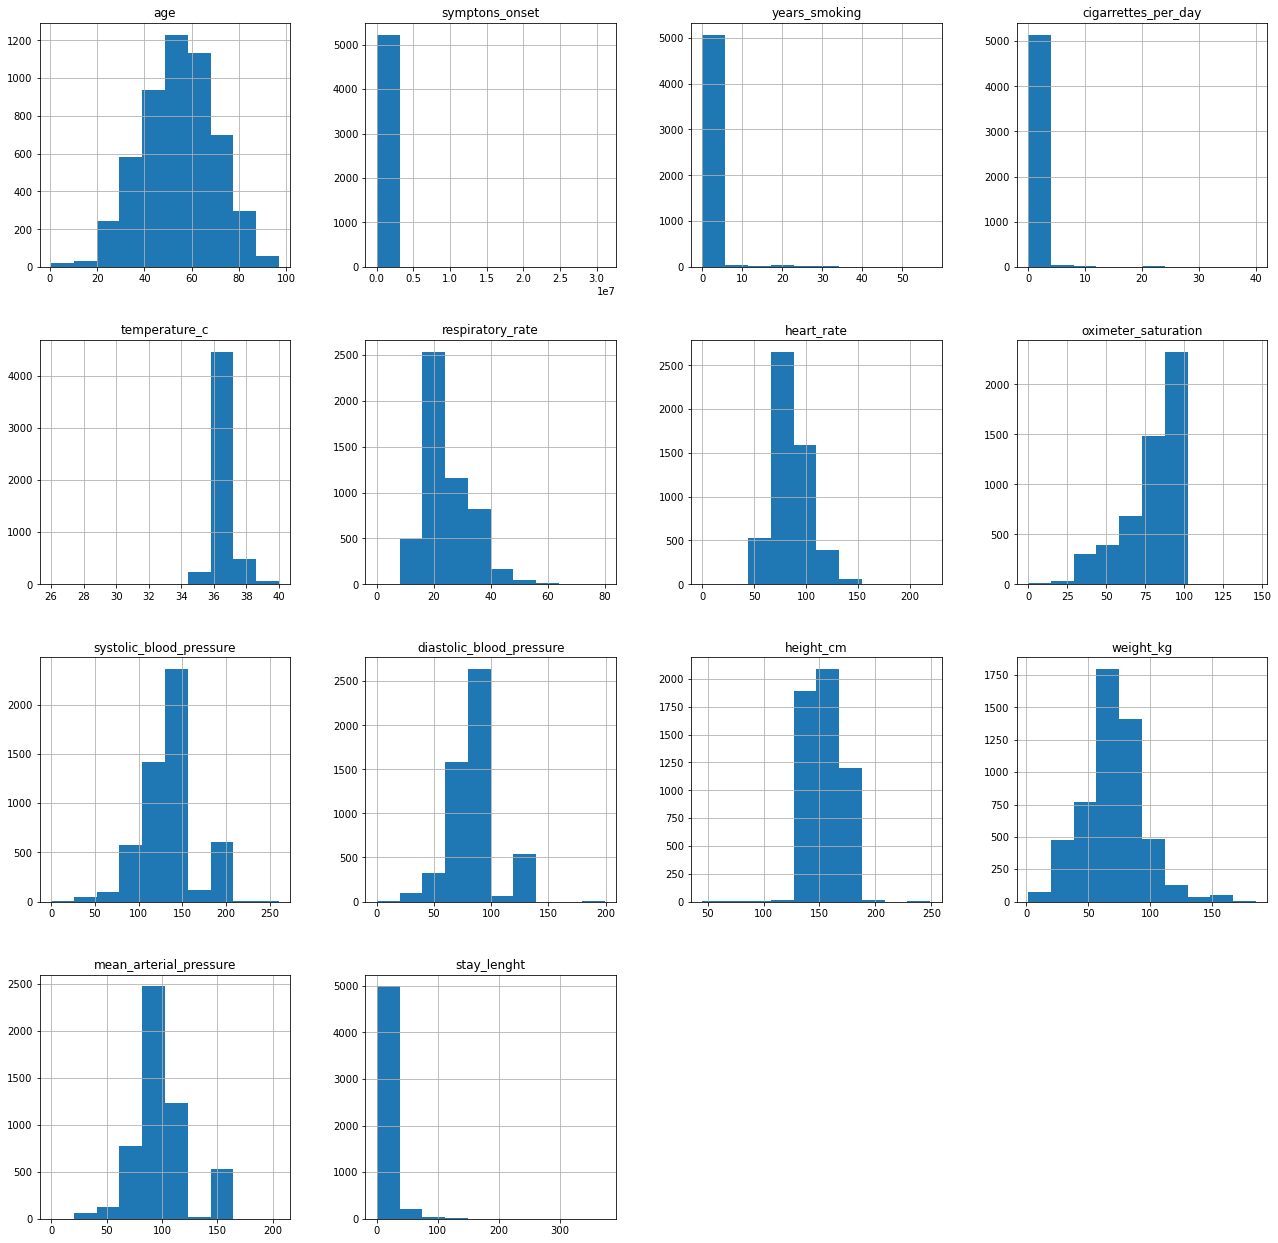

In [22]:
z = covid_patients[varc].astype(float).hist(figsize=(22,22))

### Extrem Values

In [23]:
covid_patients[varc].describe(percentiles=[0.01,0.05,0.95,0.99]).T

,count,mean,std,min,1%,5%,50%,95%,99%,max
age,5232.0000,54.6170,15.4945,0.4546,19.6391,28.5454,55.0662,79.6100,88.0061,96.9300
symptons_onset,5232.0000,15941.1745,621472.3510,-7.0000,2.0000,4.0000,8.0000,15.0000,20.0000,31082021.0000
years_smoking,5232.0000,0.6960,4.3599,0.0000,0.0000,0.0000,0.0000,0.0000,25.0000,57.0000
cigarrettes_per_day,5232.0000,0.2091,1.7790,0.0000,0.0000,0.0000,0.0000,0.0000,5.6900,40.0000
temperature_c,5232.0000,36.5793,0.6095,26.0000,35.1000,35.9000,36.5000,37.6000,38.6000,40.0000
respiratory_rate,5232.0000,23.9276,8.2465,0.0000,13.0000,15.0000,22.0000,38.0000,50.0000,80.0000
heart_rate,5232.0000,84.9742,17.4603,0.0000,58.0000,59.0000,85.0000,116.0000,133.0000,220.0000
oximeter_saturation,5232.0000,79.8407,18.4044,0.0000,30.0000,40.0000,85.0000,99.0000,99.0000,146.0000
systolic_blood_pressure,5232.0000,132.2490,30.3211,0.0000,55.3100,90.0000,130.0000,195.0000,195.0000,260.0000
diastolic_blood_pressure,5232.0000,81.3563,18.9503,0.0000,30.0000,52.0000,80.0000,120.0000,120.0000,199.0000


<img width="578" alt="varcDescriptions" src="https://user-images.githubusercontent.com/90414330/157526183-15e937a5-ba8f-495b-ae80-6bdcfdb6bc22.png">

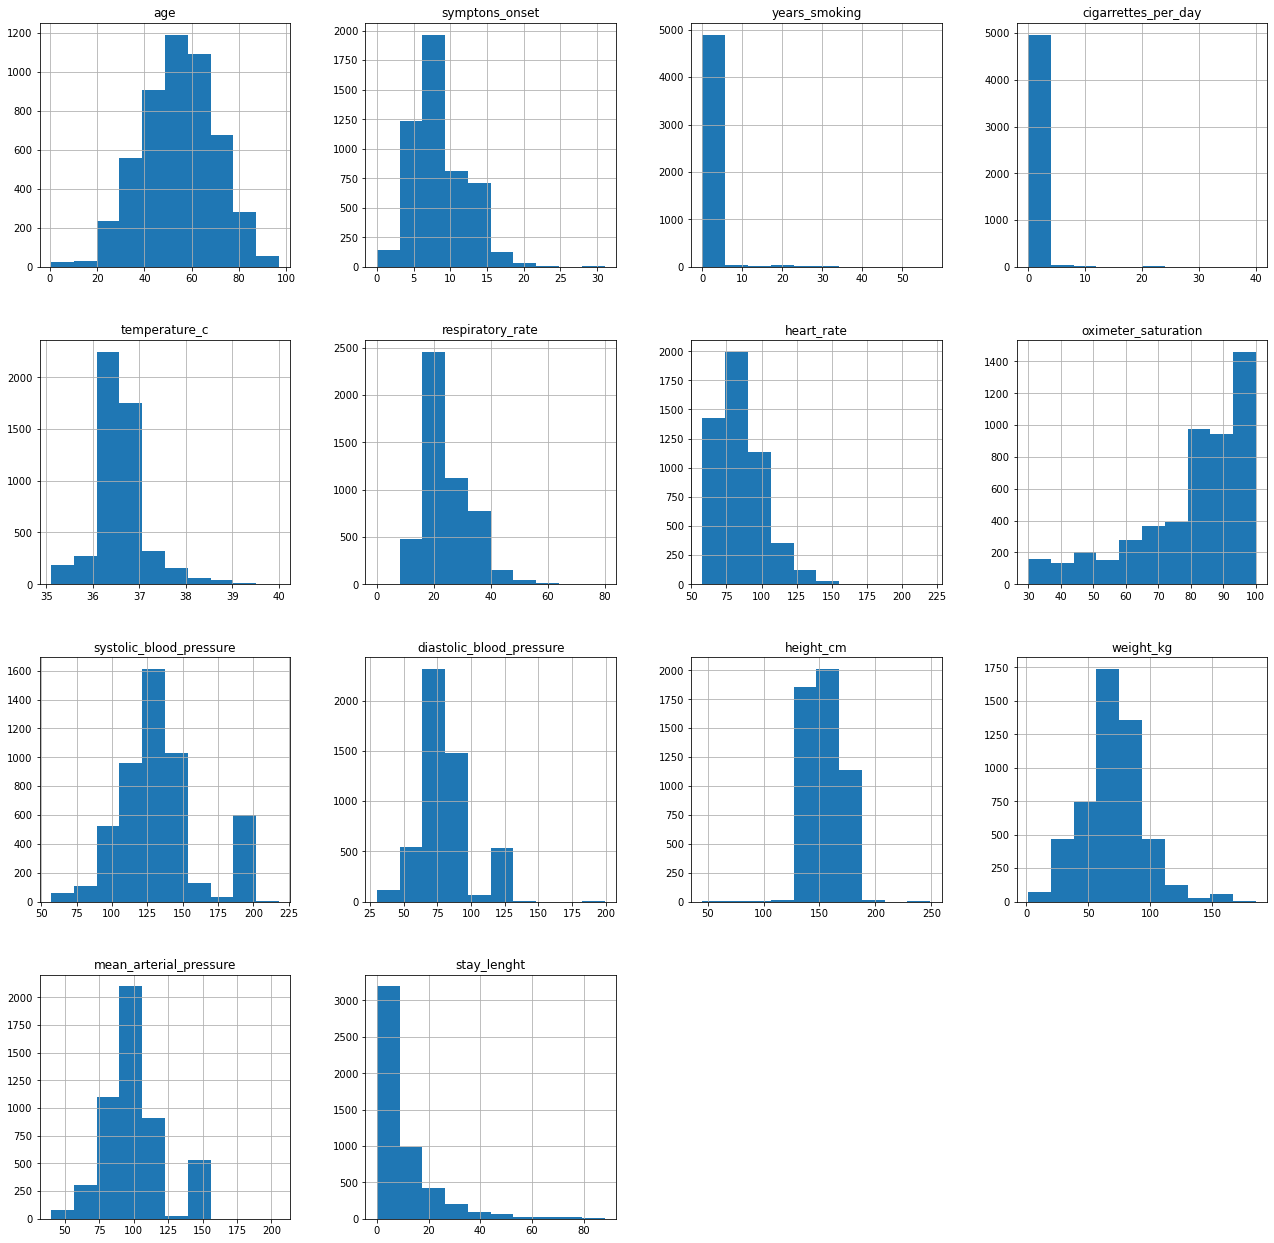

In [24]:
covid_patients=covid_patients.loc[covid_patients['symptons_onset']>=0]
covid_patients=covid_patients.loc[covid_patients['symptons_onset']<=31]
covid_patients=covid_patients.loc[covid_patients['temperature_c']>=35.1]
covid_patients=covid_patients.loc[covid_patients['heart_rate']>=58.0]
covid_patients=covid_patients.loc[covid_patients['oximeter_saturation']>=30.0]
covid_patients=covid_patients.loc[covid_patients['oximeter_saturation']<=100]
covid_patients=covid_patients.loc[covid_patients['systolic_blood_pressure']>=55.3]
covid_patients=covid_patients.loc[covid_patients['diastolic_blood_pressure']>=30.0]
covid_patients=covid_patients.loc[covid_patients['mean_arterial_pressure']>=39.6]
covid_patients=covid_patients.loc[covid_patients['stay_lenght']<=90]

z = covid_patients[varc].astype(float).hist(figsize=(22,22))

### Correlated Columns

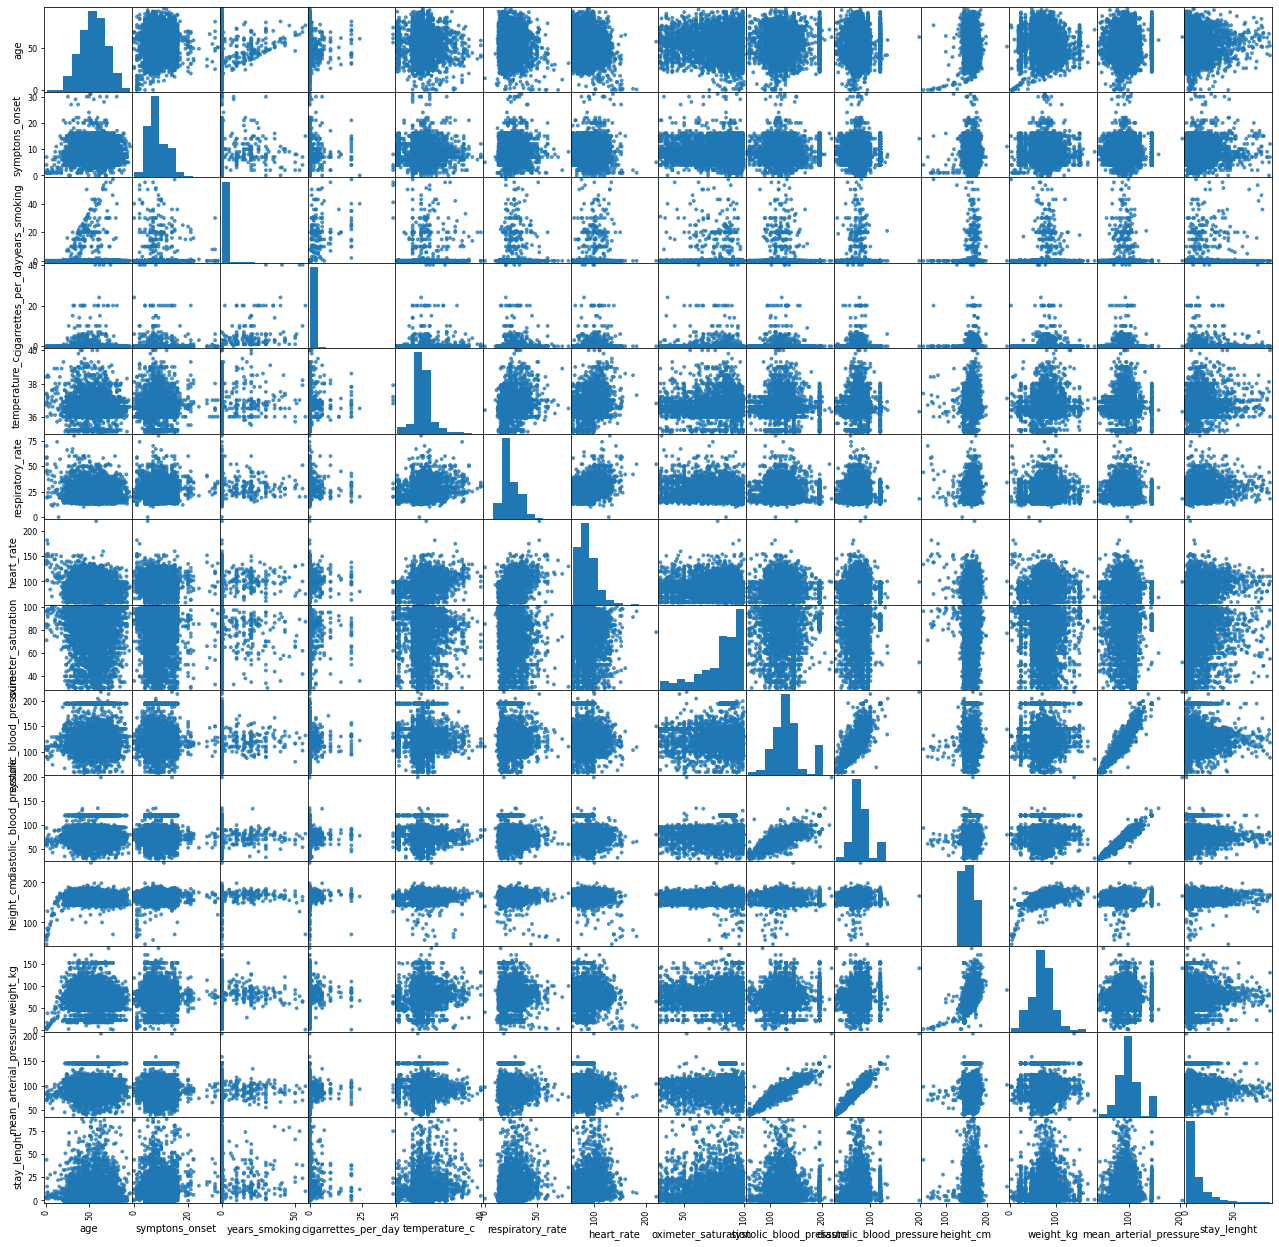

In [25]:
d = pd.plotting.scatter_matrix(covid_patients[varc],
                               figsize=(22,22),
                               marker = 'o',
                               hist_kwds = {'bins': 10}, 
                               s = 15,
                               alpha = 0.8)

Using a Pair Plot, it's easier to find those columns that might be correlated. As mean_arterial_pressure with systolic_blood_pressure and diastolic_blood_pressure

<AxesSubplot:xlabel='mean_arterial_pressure', ylabel='systolic_blood_pressure'>

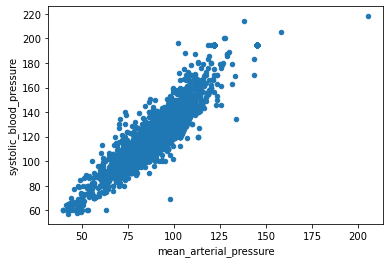

In [26]:
covid_patients.plot(kind='scatter',x='mean_arterial_pressure',y='systolic_blood_pressure')

<AxesSubplot:xlabel='mean_arterial_pressure', ylabel='diastolic_blood_pressure'>

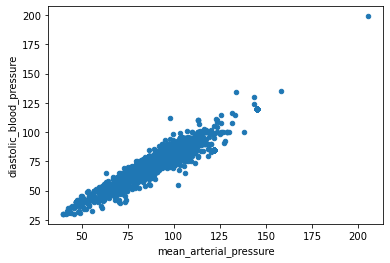

In [27]:
covid_patients.plot(kind='scatter',x='mean_arterial_pressure',y='diastolic_blood_pressure')

In [28]:
covid_patients = covid_patients.drop('mean_arterial_pressure',axis=1)

varc.remove('mean_arterial_pressure')

# Recall

In [29]:
print('After the analysis, we ended up with the columns: \n')
for v in covid_patients.columns.to_list():
    print(v, end=', ')
print(f"\n\nWe kept: {len(covid_patients.columns.to_list())} columns")

After the analysis, we ended up with the columns: 

identification, healthcare_center, pcr_antigen, inclusion_positive_covid_tests, birth_date, age, sex, admission_date, symptons_onset, comorbilities, obesity, diabetes_mellitus, arterial_hypertension, smoking, alcoholism, cardiovascular_disease, active_smoking, years_smoking, cigarrettes_per_day, vaccination, temperature_c, respiratory_rate, heart_rate, oximeter_saturation, systolic_blood_pressure, diastolic_blood_pressure, height_cm, weight_kg, glasgow_coma_scale, dopamine, dosis_of_dopamine_or_norepinephrine, use_of_oxygen_before_arrival, administration_of_oxygen_in_any_modality_at_any_time_during_the, maximum_respiratory_support_during_any_time_of_the_hospitalizat, imv_respiratory_support, pronation_respiratory_support, date_of_intubation, date_of_extubation, hemodialysis, outcome, leaving_date, stay_lenght, latitude, longitude, 

We kept: 44 columns


## Not usefull columns

And columns that will be delated are:
- 'identification'
- 'pcr_antigen': the type of test used to detect COVID-19 doesn't influences the outcome of a patient.
- 'inclusion_positive_covid_tests'
- 'leaving date'
- lat_lon variables

In [30]:
delete = ['identification','pcr_antigen','inclusion_positive_covid_tests','leaving_date']+lat_lon
covid_patients.drop(delete,axis=1,inplace=True)

dates.remove('leaving_date')

covid_patients.shape

(5052, 38)

# Data Preprocessing

## Label Encoding

### Boolean Columns

In [31]:
vard.remove('pcr_antigen')
vard.remove('inclusion_positive_covid_tests')

binary = [column for column in covid_patients[vard].columns.to_list()
             if len(covid_patients[column].value_counts())==2]
for v in ['sex','use_of_oxygen_before_arrival','outcome']:
    binary.remove(v)
for v in binary:
    covid_patients[v] = covid_patients[v].astype(int)

In [32]:
freq(covid_patients,covid_patients[vard+dates].columns.to_list())

Frequencies Table for the Column ** healthcare_center **
          AF     RF
HRAEI   3752 0.7427
INER     818 0.1619
OTHERS   204 0.0404
HJM      150 0.0297
GEA      128 0.0253

Frequencies Table for the Column ** sex **
          AF     RF
Male    3155 0.6245
Female  1897 0.3755

Frequencies Table for the Column ** comorbilities **
     AF     RF
0  3189 0.6312
1  1863 0.3688

Frequencies Table for the Column ** obesity **
     AF     RF
0  4088 0.8092
1   964 0.1908

Frequencies Table for the Column ** diabetes_mellitus **
     AF     RF
0  4278 0.8468
1   774 0.1532

Frequencies Table for the Column ** arterial_hypertension **
     AF     RF
0  4344 0.8599
1   708 0.1401

Frequencies Table for the Column ** smoking **
     AF     RF
0  4775 0.9452
1   277 0.0548

Frequencies Table for the Column ** alcoholism **
     AF     RF
0  5003 0.9903
1    49 0.0097

Frequencies Table for the Column ** cardiovascular_disease **
     AF     RF
0  4998 0.9893
1    54 0.0107

Frequencies Table f

### LabelEncoder

In [33]:
columns = ['healthcare_center',
           'sex',
           'glasgow_coma_scale',
           'dosis_of_dopamine_or_norepinephrine',
           'maximum_respiratory_support_during_any_time_of_the_hospitalizat',
           'outcome'] + dates

covid_patients_l = covid_patients.copy()
for v in columns:
    covid_patients_l[v] = LabelEncoder().fit_transform(covid_patients[v])

In [34]:
covid_patients_l.sample(n=5)

,healthcare_center,birth_date,age,sex,admission_date,symptons_onset,comorbilities,obesity,diabetes_mellitus,arterial_hypertension,smoking,alcoholism,cardiovascular_disease,active_smoking,years_smoking,cigarrettes_per_day,vaccination,temperature_c,respiratory_rate,heart_rate,oximeter_saturation,systolic_blood_pressure,diastolic_blood_pressure,height_cm,weight_kg,glasgow_coma_scale,dopamine,dosis_of_dopamine_or_norepinephrine,use_of_oxygen_before_arrival,administration_of_oxygen_in_any_modality_at_any_time_during_the,maximum_respiratory_support_during_any_time_of_the_hospitalizat,imv_respiratory_support,pronation_respiratory_support,date_of_intubation,date_of_extubation,hemodialysis,outcome,stay_lenght
5168,3,3769,38.1199,0,703,9.0000,1,1,0,0,0,0,0,0,0.0000,0.0000,1,36.0000,40.0000,140.0000,43.0000,137.0000,79.0000,149.0000,70.0000,0,0,2,1,1,1,0,1,590,594,0,1,14.0000
5345,4,359,76.5875,0,768,6.0000,1,0,0,1,0,0,0,0,0.0000,0.0000,0,36.5000,25.0000,90.0000,88.0000,170.0000,80.0000,140.0000,50.0000,0,1,0,0,1,1,1,0,646,0,0,0,6.0000
4109,2,1950,57.4714,1,514,5.0000,1,1,0,1,0,0,0,0,0.0000,0.0000,0,36.3000,16.0000,59.0000,99.0000,130.0000,80.0000,167.0000,70.0000,0,0,2,1,0,2,0,0,0,0,0,1,0.0000
1321,2,103,83.5910,0,112,9.0000,0,0,0,0,0,0,0,0,0.0000,0.0000,0,36.3000,27.0000,97.0000,94.0000,130.0000,85.0000,145.0000,63.0000,0,0,2,1,0,2,0,0,0,0,0,1,6.0000
4875,2,4419,20.0470,1,729,6.0000,0,0,0,0,0,0,0,0,0.0000,0.0000,1,36.3000,21.0000,89.0000,85.0000,96.0000,64.0000,152.0000,73.0000,0,0,2,1,0,2,0,0,0,0,0,1,1.0000


## X and y DataFrames

In [35]:
y = covid_patients_l['outcome']
X = covid_patients_l.drop(['outcome'],axis=1)

## Normalize X

In [36]:
X.columns = X.columns.astype(str)

In [37]:
X_scaled = MinMaxScaler().fit_transform(X)
X_scaledf = pd.DataFrame(X_scaled, columns = X.columns.astype(str))
X_scaledf.head()

,healthcare_center,birth_date,age,sex,admission_date,symptons_onset,comorbilities,obesity,diabetes_mellitus,arterial_hypertension,smoking,alcoholism,cardiovascular_disease,active_smoking,years_smoking,cigarrettes_per_day,vaccination,temperature_c,respiratory_rate,heart_rate,oximeter_saturation,systolic_blood_pressure,diastolic_blood_pressure,height_cm,weight_kg,glasgow_coma_scale,dopamine,dosis_of_dopamine_or_norepinephrine,use_of_oxygen_before_arrival,administration_of_oxygen_in_any_modality_at_any_time_during_the,maximum_respiratory_support_during_any_time_of_the_hospitalizat,imv_respiratory_support,pronation_respiratory_support,date_of_intubation,date_of_extubation,hemodialysis,stay_lenght
0,0.7500,0.5748,0.5319,1.0000,0.7469,0.1935,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.2857,0.6250,0.3395,0.6571,0.4348,0.3018,0.5776,0.3891,0.3333,0.0000,1.0000,0.0000,0.0000,0.5000,0.0000,1.0000,0.7380,0.7609,0.0000,0.2614
1,0.7500,0.8050,0.4098,1.0000,0.7345,0.2581,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4694,0.4500,0.2593,0.8143,0.4534,0.3136,0.6022,0.4000,0.3333,0.0000,1.0000,1.0000,0.0000,0.5000,0.0000,1.0000,0.7246,0.7338,1.0000,0.2614
2,0.7500,0.6981,0.4664,1.0000,0.3598,0.2581,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6939,0.4750,0.3395,0.9286,0.3292,0.2189,0.6120,0.4273,0.3333,1.0000,0.5000,0.0000,0.0000,0.5000,0.0000,1.0000,0.3039,0.3383,0.0000,0.5341
3,0.7500,0.4484,0.5859,1.0000,0.7357,0.2581,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1837,0.4500,0.4444,0.3429,0.5155,0.2959,0.5383,0.3291,0.3333,0.0000,1.0000,1.0000,0.0000,0.5000,0.0000,1.0000,0.7260,0.7353,0.0000,0.2500
4,0.7500,0.7894,0.4197,0.0000,0.6774,0.2581,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3878,0.4500,0.2531,0.5771,0.5590,0.3018,0.6562,0.3891,0.3333,0.0000,1.0000,1.0000,0.0000,0.5000,0.0000,1.0000,0.6632,0.6962,0.0000,0.5909


## Information Gain

In this section, we'll use Mutual Information from the *Sklearn* library to obtain a sorted list of the relation between the variables of the dataframe *X* and *y*.

> "**Mutual information (MI) [1]_** between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency".


<BarContainer object of 37 artists>

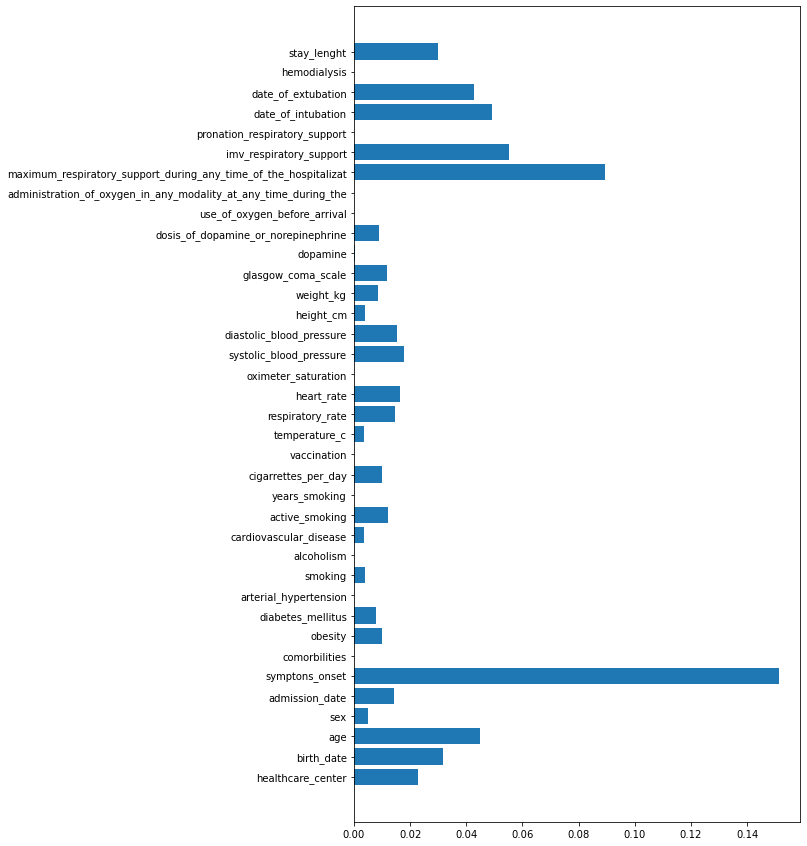

In [38]:
importances = mutual_info_classif(X_scaledf,y)
feat_importances = pd.Series(importances,X_scaledf.columns)
plt.subplots(figsize=(8,15))
plt.barh(X_scaledf.columns,feat_importances)

**Best Variables**

In [39]:
print(feat_importances.sort_values(ascending=False))
best = feat_importances.sort_values(ascending=False).index.to_list()

symptons_onset                                                    0.1514
maximum_respiratory_support_during_any_time_of_the_hospitalizat   0.0894
imv_respiratory_support                                           0.0552
date_of_intubation                                                0.0492
age                                                               0.0448
date_of_extubation                                                0.0428
birth_date                                                        0.0316
stay_lenght                                                       0.0299
healthcare_center                                                 0.0230
systolic_blood_pressure                                           0.0179
heart_rate                                                        0.0163
diastolic_blood_pressure                                          0.0155
respiratory_rate                                                  0.0148
admission_date                                     

# Logistic Regression MLM

In [40]:
y = y.astype(int)

## All Features

### Training

In [41]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaledf, y, random_state=42, stratify=y)

In [42]:
classifier = LogisticRegression(max_iter=150)

In [43]:
# fit the model with data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=150)

### Results

In [44]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
# results[results['Prediction']==results['Actual']]
results

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
1258,1,1
1259,0,0
1260,1,1
1261,1,1


In [45]:
full_accuracy = accuracy_score(y_test, y_pred).copy()
print(full_accuracy)

0.8273950910530483


In [46]:
confusion_matrix(y_test,y_pred)

array([[431, 136],
       [ 82, 614]], dtype=int64)

In [47]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       567
           1       0.82      0.88      0.85       696

    accuracy                           0.83      1263
   macro avg       0.83      0.82      0.82      1263
weighted avg       0.83      0.83      0.83      1263



## Best 10 Features

In [48]:
bestv_count = 10

In [49]:
best[:bestv_count]

['symptons_onset',
 'maximum_respiratory_support_during_any_time_of_the_hospitalizat',
 'imv_respiratory_support',
 'date_of_intubation',
 'age',
 'date_of_extubation',
 'birth_date',
 'stay_lenght',
 'healthcare_center',
 'systolic_blood_pressure']

In [50]:
X_bestvars = X_scaledf[best[:bestv_count]]
X_bestvars.head(4)

,symptons_onset,maximum_respiratory_support_during_any_time_of_the_hospitalizat,imv_respiratory_support,date_of_intubation,age,date_of_extubation,birth_date,stay_lenght,healthcare_center,systolic_blood_pressure
0,0.1935,0.5000,0.0000,0.7380,0.5319,0.7609,0.5748,0.2614,0.7500,0.4348
1,0.2581,0.5000,0.0000,0.7246,0.4098,0.7338,0.8050,0.2614,0.7500,0.4534
2,0.2581,0.5000,0.0000,0.3039,0.4664,0.3383,0.6981,0.5341,0.7500,0.3292
3,0.2581,0.5000,0.0000,0.7260,0.5859,0.7353,0.4484,0.2500,0.7500,0.5155


### Training

In [51]:
# Split training/test datasets
Xbestvars_train, Xbestvars_test, ybestvars_train, ybestvars_test = train_test_split(X_bestvars,
                                                                                    y,
                                                                                    random_state=42,
                                                                                    stratify=y)

In [52]:
bestv_classifier = LogisticRegression(max_iter=150)

In [53]:
# fit the model with data
bestv_classifier.fit(Xbestvars_train, ybestvars_train)

LogisticRegression(max_iter=150)

In [54]:
ybestvars_pred = bestv_classifier.predict(Xbestvars_test)
results = pd.DataFrame({"Prediction": ybestvars_pred, "Actual": ybestvars_test}).reset_index(drop=True)
# results[results['Prediction']==results['Actual']]
results

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
1258,1,1
1259,0,0
1260,1,1
1261,1,1


### Results

In [55]:
bestv_accuracy = accuracy_score(ybestvars_test, ybestvars_pred).copy()
print(bestv_accuracy)

0.8076009501187649


In [56]:
confusion_matrix(ybestvars_test,ybestvars_pred)

array([[421, 146],
       [ 97, 599]], dtype=int64)

In [57]:
report = classification_report(ybestvars_test, ybestvars_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       567
           1       0.80      0.86      0.83       696

    accuracy                           0.81      1263
   macro avg       0.81      0.80      0.80      1263
weighted avg       0.81      0.81      0.81      1263



In [58]:
print(f'Full Accuracy: {full_accuracy*100} vs Best Accuracy: {bestv_accuracy*100}%')
print(f"\nThe difference between the models isn't \"meaningful\" --{(full_accuracy-bestv_accuracy)*100:.2f}%, which means that the {bestv_count} features are enough to predict the outcome of a patient")

Full Accuracy: 82.73950910530483 vs Best Accuracy: 80.76009501187649%

The difference between the models isn't "meaningful" --1.98%, which means that the 10 features are enough to predict the outcome of a patient
